# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [9]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews


  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 216MB/s]


In [10]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [11]:
train_fname = "/content/data/train.tsv.zip"
test_fname = "/content/data/test.tsv.zip"
sub_fname = "/content/data/sampleSubmission.csv.zip"


### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [95]:
train = pd.read_csv(train_fname,sep = '\t')
test = pd.read_csv(test_fname,sep = '\t')
sub = pd.read_csv('/content/data/sampleSubmission.csv')

In [13]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [72]:
test.shape

(66292, 3)

In [60]:
test['Phrase'].fillna('', inplace=True)

,PhraseId,SentenceId,Phrase
15519,171580,9213,NaN


In [96]:
sub.shape

(66292, 2)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [18]:
train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


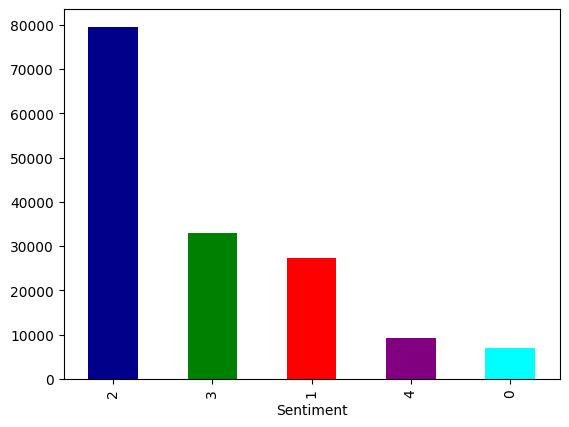

In [19]:
train.Sentiment.value_counts().plot(kind = 'bar',color = ['darkblue', 'green', 'red','purple','cyan']);

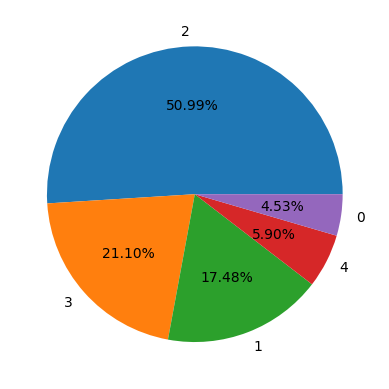

In [20]:
new = train.Sentiment.value_counts()
plt.pie(new.values,labels = new.index,autopct = '%.2f%%');

Summarize your insights and learnings from the dataset below:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

* `More than 50% of the are neutral, 21.1% are somewhat positive, 17.48% are somewhat negative, 5.9% are positive and 4.5% are negative sentiments.`
* `There are 4 columns and 156,060 rows in the dataset`
* `27% of the sentiments are on the positive side whereas 23.4% is on the negative side`


## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [21]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stemmer = PorterStemmer()
def tokenize_word(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [23]:
eng_stopwords = stopwords.words('english')

In [24]:
vectorizer = TfidfVectorizer(
    tokenizer = tokenize_word,
    stop_words = eng_stopwords,
    lowercase = True,
    max_features = 1000)

In [25]:
 X = vectorizer.fit_transform(train.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [83]:
test.shape

(66292, 3)

In [84]:
X_test = vectorizer.fit_transform(test.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [85]:
X_test.shape

(66292, 1000)

In [27]:
len(vectorizer.vocabulary_)

1000

In [28]:
vectorizer.get_feature_names_out()[:100]

array(['!', "'", "'60", "'70", "'d", "'ll", "'m", "'re", "'s", "'ve", ',',
       '-', '--', '-lrb-', '-rrb-', '.', '...', '2', ':', ';', '?', '\\/',
       '`', '``', 'abil', 'abov', 'absolut', 'abus', 'access',
       'accomplish', 'achiev', 'act', 'action', 'actor', 'actress',
       'actual', 'adapt', 'add', 'admir', 'adult', 'adventur', 'affair',
       'affect', 'age', 'ago', 'air', 'alien', 'aliv', 'allow', 'almost',
       'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz',
       'ambit', 'america', 'american', 'among', 'amus', 'angel', 'ani',
       'anim', 'anoth', 'anyon', 'anyth', 'anywher', 'apart', 'appeal',
       'appear', 'appreci', 'approach', 'around', 'art', 'artist',
       'attempt', 'attent', 'audienc', 'authent', 'avoid', 'aw', 'awar',
       'away', 'awkward', 'back', 'bad', 'badli', 'balanc', 'bare',
       'beat', 'beauti', 'becaus', 'becom', 'befor', 'begin', 'behavior',
       'behind', 'believ'], dtype=object)

In [29]:
X.shape

(156060, 1000)

In [30]:
y = train.Sentiment

In [31]:
y.shape

(156060,)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size = 0.2,stratify=y,random_state = 40)

### Train Logistic Regression Model



In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, solver = 'sag')
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='sag')

In [34]:
y_pred = lr.predict(X_train)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.599352813020633

In [36]:
y_val_pred = lr.predict(X_val)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,y_val_pred)

0.5881391772395232

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
              'solver':['lbfgs','liblinear','saga'],
              'penalty':['l1','l2','elasticnet'],
              'C':[0.001, 0.01, 0.1, 1]
              }
lr_model = LogisticRegression()
clf = GridSearchCV(lr_model,param_grid = param_grid, cv = 5, scoring ='accuracy',n_jobs = -1)
clf.fit(X_train,y_train)
clf.best_params_
model = clf.best_estimator_
y_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [39]:
accuracy_score(y_train,y_pred)

0.5996011149557863

In [40]:
accuracy_score(y_val,y_val_pred)

0.5878828655645265

In [86]:
X_test.shape

(66292, 1000)

In [87]:
test_best_preds = model.predict(X_test)

In [98]:
sub.shape

(66292, 2)

In [99]:
test_best_preds.shape

(66292,)

In [100]:
sub.Sentiment = test_best_preds

In [102]:
sub

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [103]:
sub.to_csv('submission.csv',index = None)

In [104]:
sub.shape

(66292, 2)

### Study Predictions on Sample Inputs

In [ ]:
sample = train.sample(50)

In [ ]:
X_sample = vectorizer.fit_transform(sample.Phrase)

In [ ]:
sample_pred = lr.predict(X_sample)

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [ ]:
test_pred = model.predict(X_test)

In [ ]:
test_pred

In [ ]:
sub

In [ ]:
sub.Sentiment = test_pred

In [ ]:
sub

In [ ]:
sub.to_csv('Submission.csv',index = None)

## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.train(X_train,y_train)

In [ ]:
dt_y_pred = dt.predict(X_train)

In [ ]:
accuracy_score(y_train,dt_y_pred)

In [ ]:
dt_y_val_pred = dt.predict(X_val)

In [ ]:
accuracy_score(y_val,dt_y_val_pred)

### Model 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
rf_y_pred = rf.predict(X_train)

In [ ]:
accuracy_score(y_train,rf_y_pred)

In [ ]:
rf_y_val_pred = rf.predict(X_val)

In [ ]:
accuracy_score(y_val,rf_y_val_pred)

### Model 3

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train,y_train)

In [ ]:
gb_y_pred = gb.predict(X_train)

In [ ]:
accuracy_score(y_train,gb_y_pred)

In [ ]:
gb_y_val_pred = gb.predict(X_val)

In [ ]:
accuracy_score(y_val,gb_y_val_pred)

### Model 4

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

In [ ]:
nb_y_pred = nb.predict(X_train)

In [ ]:
accuracy_score(y_train,nb_y_pred)

In [ ]:
nb_y_val_pred = nb.predict(X_val)

In [ ]:
accuracy_score(y_val,nb_y_val_pred)

### Model 5

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.train(X_train,y_train)

In [ ]:
svc_y_pred = svc.predict(X_train)

In [ ]:
accuracy_score(y_train,svc_y_pred)

In [ ]:
svc_y_val_pred = svc.predict(X_val)

In [ ]:
accuracy_score(y_val,svc_y_val_pred)

Best Model:

???

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
